### Introduction to Depth-First Search (DFS)

Depth-First Search (DFS) is a fundamental graph traversal algorithm. It systematically explore or traverse the entire graph from a starting point a graph, moving as far as possible along each branch before backtracking. This approach ensures that every node is visited exactly once, making it a crucial tool for various applications like maze solving, cycle detection, and pathfinding in unweighted graphs.

### Graphs in Depth-First Search

To understand DFS, it's essential to grasp the concept of graphs:

**Nodes and Edges**

- **Nodes (Vertices):** Represent entities such as cities, intersections, or any discrete entity.
- **Edges:** Represent the paths or connections between nodes, either directed or undirected.

### Key Concepts

**Traversal Order**

- DFS starts at a specified node and explores as far as possible along each branch before backtracking.
- It uses a stack data structure (or recursion) to keep track of nodes to visit next.

**Applications**

- **Pathfinding:** DFS can be used to find paths between two nodes in an unweighted graph.
- **Cycle Detection:** It's useful in detecting cycles in a graph.
- **Topological Sorting:** DFS can order nodes in a directed acyclic graph (DAG).

### How DFS Works

1. **Initialization:** Start at a given node and mark it as visited.
2. **Explore:** Visit all adjacent nodes that have not been visited, marking them as visited recursively.
3. **Backtrack:** If all adjacent nodes are visited, backtrack to the previous node and continue exploration.

### Visualize


![image.png](https://upload.wikimedia.org/wikipedia/commons/7/7f/Depth-First-Search.gif)


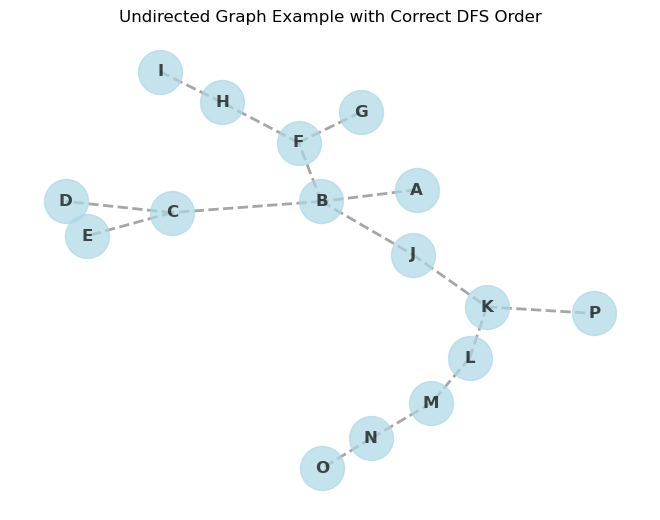

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
P = nx.Graph()

# Add nodes
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]
P.add_nodes_from(nodes)

# Add edges without weights


graph = {
    'A': ['B'],
    'B': ['C', 'F', 'J'],
    'C': ['D', 'E'],
    'D': [],
    'E': [],
    'F': ['G', 'H'],
    'G': [],
    'H': ['I'],
    'I': [],
    'J': ['K'],
    'K': ['L', 'P'],
    'L': ['M'],
    'M': ['N'],
    'N': ['O'],
    'O': []
}

edges = []


# Iterate over each node and its neighbors in the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        edges.append((node, neighbor))

P.add_edges_from(edges)

pos = nx.spring_layout(P, seed=42)  # Positions for all nodes with a fixed seed for reproducibility
nx.draw(
    P,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=1000,
    edge_color="gray",
    width=2,
    alpha=0.7,
    style="dashed",
)
plt.title("Undirected Graph Example with Correct DFS Order")
plt.show()


In [46]:

def dfs(graph, start_node):
    visited = []  # List to keep track of visited nodes in order
    stack = [start_node]  # Initialize stack with the start node

    count_iterations = 1

    while stack:
        print(f"\n------ Iteration {count_iterations} ------\n")
        print("Current stack:", stack)
        print("Visited nodes:", visited)
        
        node = stack.pop()
        if node not in visited:
            visited.append(node)  # Append node to visited list
            print(f"Visiting node: {node}")

            # Iterate over neighbors in reverse order to maintain DFS order
            neighbors = graph.get(node, [])  # Get neighbors of the current node
            count_node_iterations = 1
            
            print(f"Iterating neighbors of {node}:")
            for neighbor in reversed(neighbors):
                if neighbor not in visited:
                    stack.append(neighbor)
                    print(f"  Adding neighbor '{neighbor}' to stack")

                count_node_iterations += 1
            
        count_iterations += 1

    print("\nDFS traversal completed.")
    print("Visited nodes in DFS order:", visited)


dfs(graph, 'A')



------ Iteration 1 ------

Current stack: ['A']
Visited nodes: []
Visiting node: A
Iterating neighbors of A:
  Adding neighbor 'B' to stack

------ Iteration 2 ------

Current stack: ['B']
Visited nodes: ['A']
Visiting node: B
Iterating neighbors of B:
  Adding neighbor 'J' to stack
  Adding neighbor 'F' to stack
  Adding neighbor 'C' to stack

------ Iteration 3 ------

Current stack: ['J', 'F', 'C']
Visited nodes: ['A', 'B']
Visiting node: C
Iterating neighbors of C:
  Adding neighbor 'E' to stack
  Adding neighbor 'D' to stack

------ Iteration 4 ------

Current stack: ['J', 'F', 'E', 'D']
Visited nodes: ['A', 'B', 'C']
Visiting node: D
Iterating neighbors of D:

------ Iteration 5 ------

Current stack: ['J', 'F', 'E']
Visited nodes: ['A', 'B', 'C', 'D']
Visiting node: E
Iterating neighbors of E:

------ Iteration 6 ------

Current stack: ['J', 'F']
Visited nodes: ['A', 'B', 'C', 'D', 'E']
Visiting node: F
Iterating neighbors of F:
  Adding neighbor 'H' to stack
  Adding neighbor 